0.000307
0.000614
0.0009209999999999999
0.001228
0.001535
0.0018419999999999999
0.002149
0.002456
0.002763
0.00307
0.003377
0.0036839999999999998
0.003991
0.004298
0.004605
0.004912
0.005219
0.005526
0.005833
0.00614
0.006447
0.006754
0.007061
0.0073679999999999995
0.0076749999999999995
0.007982
0.008289
0.008596
0.008903
0.00921
0.009517
0.009824
0.010131
0.010438
0.010745
0.011052
0.011359
0.011666
0.011973
0.01228
0.012587
0.012894
0.013201
0.013508
0.013815
0.014122
0.014428999999999999
0.014735999999999999
0.015042999999999999
0.015349999999999999
0.015656999999999997
0.015964
0.016271
0.016578000000000002
0.016885000000000004
0.017192000000000006
0.017499000000000008
0.01780600000000001
0.01811300000000001
0.018420000000000013
0.018727000000000014
0.019034000000000016
0.019341000000000018
0.01964800000000002
0.01995500000000002
0.020262000000000023
0.020569000000000025
0.020876000000000026
0.021183000000000028
0.02149000000000003
0.02179700000000003
0.022104000000000033
0.0224110

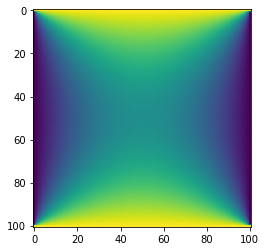

0.000589
0.001178
0.001767
0.002356
0.002945
0.0035340000000000002
0.004123
0.004712
0.005301
0.00589
0.006479
0.0070680000000000005
0.007657000000000001
0.008246
0.008834999999999999
0.009423999999999998
0.010012999999999998
0.010601999999999997
0.011190999999999996
0.011779999999999995
0.012368999999999995
0.012957999999999994
0.013546999999999993
0.014135999999999992
0.014724999999999992
0.01531399999999999
0.01590299999999999
0.01649199999999999
0.01708099999999999
0.017669999999999988
0.018258999999999987
0.018847999999999986
0.019436999999999986
0.020025999999999985
0.020614999999999984
0.021203999999999983
0.021792999999999983
0.022381999999999982
0.02297099999999998
0.02355999999999998
0.02414899999999998
0.02473799999999998
0.025326999999999978
0.025915999999999977
0.026504999999999976
0.027093999999999976
0.027682999999999975
0.028271999999999974
0.028860999999999973
0.029449999999999973
0.030038999999999972
0.03062799999999997
0.03121699999999997
0.03180599999999997
0.032394

<Figure size 432x288 with 0 Axes>

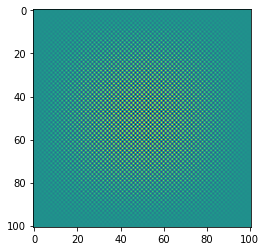

In [1]:
# Project 5: Heat Plate map
# This project will test the convergence of a heat plate with 2 hot sidee and
# 2 warm sides.  This function is very time dependent and
# even a slight change in the time steps can result with a massive change
# in the system that will cause non-sense

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# constants
L = 0.01
D = 4.25e-6  # units: m2 s-1
N = 100
dx = L/N  # change in x
dy = L/N  # change in y
dt = 3.07e-4  # time change
epsilon = dt/1000
Tlo, Tmid, Thi = 200., 250., 400.  # initial temperatures in K
image = []
num_image = 300
fig = plt.figure()
# chosen times to make plots
t1, t2, t3, t4, t5 = 0.01, 0.1, 0.4, 1.0, 10.
tend = t5 + epsilon

# create arrays

Tp = np.empty((N+1, N+1), float)
Tp[:, ] = Tmid
Tp[-1, :] = Thi
Tp[0, :] = Thi
Tp[1:N, 0] = Tlo
Tp[1:N, -1] = Tlo

# main loop to test convergence, utilizes np.roll to speed
# up the run time.

t = 0.0
c = dt*D/(dx**2)
steps = 0
while t < tend:

    steps += 1
    yu = np.roll(Tp, 1, axis=0)
    yd = np.roll(Tp, -1, axis=0)
    xu = np.roll(Tp, -1, axis=1)
    xd = np.roll(Tp, 1, axis=1)
    Tp[1:N, 1:N] = Tp[1:N, 1:N] + c*((xu[1:N, 1:N] + xd[1:N, 1:N] - 2*(Tp[1:N, 1:N])) + (yu[1:N, 1:N] + yd[1:N, 1:N] - 2*(Tp[1:N, 1:N])))

# uses a modulus if statement to append every 300th image(num_image=300)
# this will be used for the animation

    if (steps % num_image) == 0:
        image.append((plt.imshow(np.copy(Tp)), ))
    t += dt
    #print(t)
# animation for convergence

heat_con = animation.ArtistAnimation(fig, image, interval=100, repeat=False)
heat_con.save('heat2d_converged.mp4')
plt.show()
plt.clf()

# constant re initialized for second loop
# these will be used to test divergence
# diffrent time steps is initialized and all variable using that
# have been changed accordingly

t = 0
count = 0
num_image2 = 100
dt_2 = 5.89e-4
c2 = dt_2*D/(dx**2)
epsillon_2 = dt_2/1000
tend_2 = t5 + epsillon_2
Tlo, Tmid, Thi = 200., 250., 400.  # initial temperature values
image_di = []
fig2 = plt.figure()

Td = np.empty((N+1, N+1), float)
Td[:, ] = Tmid
Td[-1, :] = Thi
Td[0, :] = Thi
Td[1:N, 0] = Tlo
Td[1:N, -1] = Tlo

# loop is very similar to the one above except test for divergence now
# uses different array than above as to not mix them up / overwrite
while t < tend_2:
    count += 1

    yu = np.roll(Td, 1, axis=0)
    yd = np.roll(Td, -1, axis=0)
    xu = np.roll(Td, -1, axis=1)
    xd = np.roll(Td, 1, axis=1)
    Td[1:N, 1:N] = Td[1:N, 1:N] + c2*((xu[1:N, 1:N] + xd[1:N, 1:N] - 2*(Td[1:N, 1:N])) + (yu[1:N, 1:N] + yd[1:N, 1:N] - 2*(Td[1:N, 1:N])))

    if (count % num_image2) == 0:
        image_di.append((plt.imshow(np.copy(Td), cmap='viridis'), ))
    t += dt_2
    print(t)

# animation for divergence

heat_di = animation.ArtistAnimation(fig2, image_di, interval=100, repeat=False)
#heat_di.save('heat2d_diverged.mp4')
plt.show()
